Exploratory Data Analysis

In [30]:
# Import Necessary libraries
import pandas as pd
import warnings 

warnings.filterwarnings('ignore')

In [31]:
# Find main working repository
import sys
import os
sys.path.append(os.path.join(os.path.abspath('..')))

In [32]:
import src.data_loading as dl
from scripts.data_cleaning import DataCleaner
import src.visualizations as v

In [33]:
"""
file_ids = ['1ui98TWYt725H4oD0forEIMLPeSWb_w_w', '1NBBhkA1p05W-bHjGkWMTaztuxmn9TLpK', 
           '17CzoQKGEtMFuKNU13IykmD0oH2nInhrg', '1wFys9ps6YX6KOqcF87LRAjVQsLpLsc-G']
file_names = ['Xente_Variable_Definitions.xlsx', 'Xente_Variable_Definitions.csv',
              'data.xlsx', 'data.csv']
output_dir = '../data/raw'

# Download the file from google drive 
dl.download_file_from_google_drive(file_ids, output_dir, file_names)
"""

"\nfile_ids = ['1ui98TWYt725H4oD0forEIMLPeSWb_w_w', '1NBBhkA1p05W-bHjGkWMTaztuxmn9TLpK', \n           '17CzoQKGEtMFuKNU13IykmD0oH2nInhrg', '1wFys9ps6YX6KOqcF87LRAjVQsLpLsc-G']\nfile_names = ['Xente_Variable_Definitions.xlsx', 'Xente_Variable_Definitions.csv',\n              'data.xlsx', 'data.csv']\noutput_dir = '../data/raw'\n\n# Download the file from google drive \ndl.download_file_from_google_drive(file_ids, output_dir, file_names)\n"

In [34]:
# Load the data into a DataFrame
output_path = '../data/raw'
df = pd.read_csv(output_path + '/data.csv')

## Task 1: Overview of the Data

In [35]:
# Display the first few rows of the data set
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [36]:
# Initialize the DataCleaner
cleaner = DataCleaner(df)

In [37]:
# Apply column prefix removal
cleaner.apply_column_prefix_removal()

2024-11-21 16:31:00,469 - INFO - Applying column prefix removal...
2024-11-21 16:31:08,298 - INFO - Column prefix removal completed.


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
55456,43578,89058,2467,301,2883,UGX,256,6,3,airtime,3,4000.0,4000,2019-01-09T18:43:46Z,2,0
51187,49902,40226,2616,3159,3034,UGX,256,6,3,airtime,3,500.0,500,2019-01-05T10:09:27Z,2,0
8221,96485,13889,4389,4791,4846,UGX,256,6,3,airtime,3,1000.0,1000,2018-11-25T14:56:03Z,2,0
81555,123432,70420,4787,957,5256,UGX,256,6,10,airtime,3,10000.0,10000,2019-02-01T13:59:12Z,2,0
12286,35682,108652,4841,3829,3198,UGX,256,4,6,financial_services,2,-5000.0,5000,2018-11-30T19:00:51Z,2,0


In [38]:
# Check data types and missing values
cleaner.check_data_info()

2024-11-21 16:31:08,369 - INFO - Checking data types and missing values...
2024-11-21 16:31:08,471 - INFO - None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [39]:
 # Identify duplicates
subset_columns = ['BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 
                    'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 
                    'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

# Using all columns to find duplicates
duplicate_rows = cleaner.identify_duplicates(subset_columns)
print("Duplicate Rows:\n", duplicate_rows.shape[0])

2024-11-21 16:31:08,694 - INFO - Identifying duplicates...
2024-11-21 16:31:09,095 - INFO - Number of duplicate rows found: 317


Duplicate Rows:
 317


In [40]:
# Remove duplicates
cleaner.remove_duplicates(subset_columns, keep='first')

# Check for any remaining duplicates
remaining_duplicates = cleaner.check_for_duplicates()

2024-11-21 16:31:09,122 - INFO - Removing duplicates based on specified columns...
2024-11-21 16:31:09,465 - INFO - Duplicates removed.
2024-11-21 16:31:09,470 - INFO - Checking for any remaining duplicates...
2024-11-21 16:31:09,748 - INFO - Remaining duplicates: (0, 16)


In [41]:
# Get the final shape of the DataFrame
final_shape = cleaner.get_data_shape()

2024-11-21 16:31:09,788 - INFO - Getting data shape...
2024-11-21 16:31:09,788 - INFO - Data shape: (95475, 16)


In [42]:
# Convert the 'TransactionStartTime' column to datetime
df = cleaner.convert_to_datetime('TransactionStartTime', date_format='%Y-%m-%dT%H:%M:%SZ')

2024-11-21 16:31:10,043 - INFO - Converting column 'TransactionStartTime' to datetime format...
2024-11-21 16:31:11,562 - INFO - Column 'TransactionStartTime' successfully converted to datetime.


In [43]:
df.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
23897,31403,116456,571,873,908,UGX,256,6,3,airtime,3,1000.0,1000,2018-12-12 09:33:01,2,0
36229,95124,85085,4613,3481,5080,UGX,256,6,10,airtime,3,10000.0,10000,2018-12-21 18:34:21,2,0
30099,36981,83568,3210,3348,3638,UGX,256,6,10,airtime,3,1000.0,1000,2018-12-17 04:30:42,2,0
68470,131158,25454,4841,3829,3582,UGX,256,4,6,financial_services,2,-20.0,20,2019-01-22 18:27:40,2,0
5927,126087,47569,299,4090,627,UGX,256,6,3,airtime,3,10573.0,10573,2018-11-23 03:38:27,2,0


## Task2: Summarry Statistics 

In [44]:
# Summary the statistics 
df.describe()

,CountryCode,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
count,95475.0,9.547500e+04,9.547500e+04,95475,95475.000000,95475.000000
mean,256.0,6.720734e+03,9.909618e+03,2019-01-02 01:35:03.050652160,2.256318,0.002021
min,256.0,-1.000000e+06,2.000000e+00,2018-11-15 02:18:49,0.000000,0.000000
25%,256.0,-5.000000e+01,2.500000e+02,2018-12-12 10:09:18,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2018-12-31 17:38:07,2.000000,0.000000
75%,256.0,2.600000e+03,5.000000e+03,2019-01-25 11:03:44,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,2019-02-13 10:01:28,4.000000,1.000000
std,0.0,1.234271e+05,1.232421e+05,NaN,0.733116,0.044916


Based on the statistical summary of the transaction data, here are some insights that can be derived:

1. **High Volume of Transactions**: The count of transactions is approximately 95,662, indicating a large volume of transactions being processed.

2. **Mean Values**:

* The mean TransactionId and BatchId are high, suggesting that these identifiers are incrementing rapidly, which is expected in a high-volume transaction environment.
* The mean AccountId, SubscriptionId, and CustomerId are in the thousands, indicating a diverse user base.
* The mean CountryCode is 256.0, which might be a default or most common country code, as there's no standard deviation (std) for this value.
* The mean ProviderId and ProductId suggest a moderate number of providers and products.
* The mean ChannelId of 2.622410 might indicate that there are a few primary channels used for transactions.
* The mean Amount and Value are significantly high, indicating large transactions are being made. However, the mean FraudResult is very low (0.002018), suggesting that the majority of transactions are legitimate.

3. Variability and Spread:

* The standard deviation (std) for TransactionId, BatchId, and Amount/Value is high, indicating a wide spread in transaction values and identifiers, which is expected in a large dataset.
* The std for AccountId, SubscriptionId, CustomerId, and CountryCode is relatively small compared to their mean values, indicating that while there are many unique identifiers, they are somewhat concentrated.
* The std for ProviderId, ProductId, and ChannelId is relatively low, suggesting a limited number of these entities are involved in the transactions.

4. Distribution of Data:

* The median (50%) values suggest that half of the transactions occur below these thresholds, indicating a skewed distribution where a significant portion of transactions are below the mean.
* The interquartile range (IQR), the difference between the 75th percentile and the 25th percentile, is large for Amount and Value, indicating a wide range of transaction values.

5. Outliers and Extremes:

* The minimum values for Amount and Value are negative, indicating refunds or corrections. The maximum values are very high, suggesting large transactions.
* The maximum FraudResult is 1, indicating that some transactions are identified as fraudulent.

6. Country and Channel Concentration:

* The lack of variation in CountryCode suggests that transactions are heavily concentrated in one country or region (assuming 256 is a specific country code).
* The ChannelId values suggest a limited number of channels are used, with a preference for certain channels over others.

7.Fraud Detection:

* The low mean and minimum FraudResult values suggest that the system is effective in identifying and possibly preventing fraudulent transactions, or that the dataset predominantly consists of legitimate transactions.

These insights highlight the diversity and complexity of the transaction dataset, indicating a large volume of transactions with a wide range of values and a focus on legitimacy and fraud detection.

## Task3: Distribution of Numerical Features

In [45]:
# Identify Categorical and Numerical Data
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

View Columns description

In [46]:
# Load description data
dc_df = pd.read_csv(output_path + '/Xente_Variable_Definitions.csv')

In [47]:
# Create a pivot table (though in this case, it's more of a formatted display)
pivot_table = dc_df.pivot_table(index='Column Name', values='Definition', aggfunc=lambda x: ' '.join(x))

In [48]:
print(pivot_table.to_string())

                                                                                                                             Definition
Column Name                                                                                                                            
AccountId                                                                            Unique number identifying the customer on platform
Amount                Value of the transaction. Positive for debits from customer account and negative for credit into customer account
BatchId                                                                Unique number assigned to a batch of transactions for processing
ChannelId                                                          Identifies if customer used web,Android, IOS, pay later or checkout.
CountryCode                                                                                      Numerical geographical code of country
CurrencyCode                                    

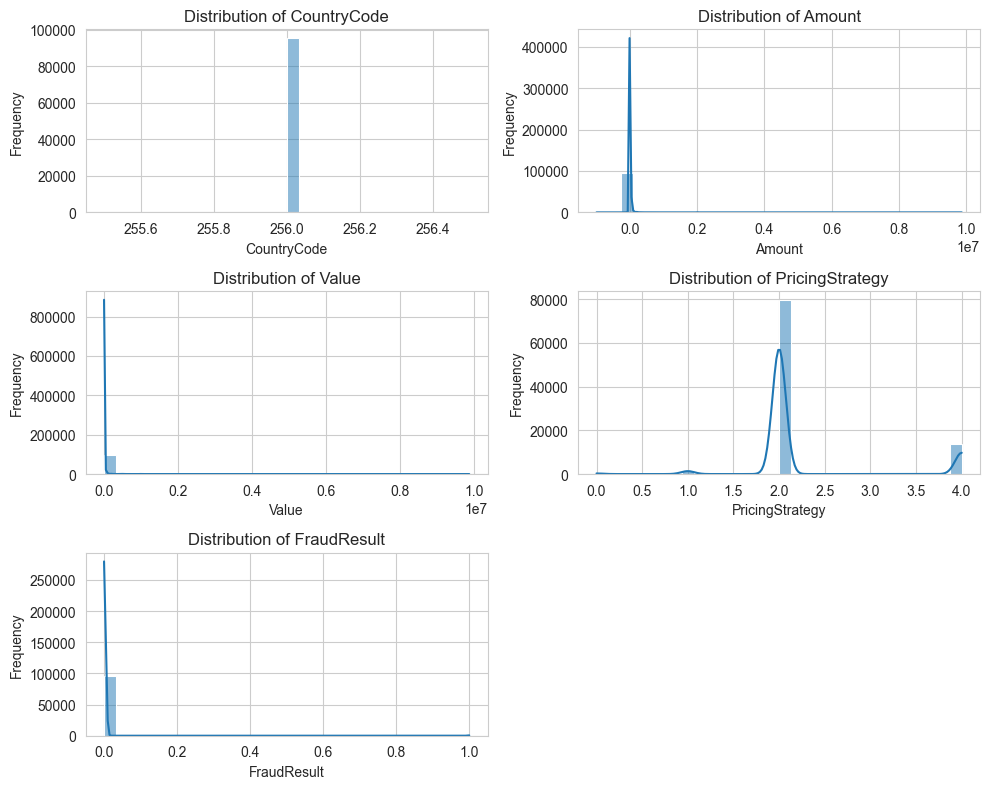

In [49]:
# Distributions of numerical columns
v.numerical_distribution(df, numerical_columns, style='whitegrid', nrows=3, ncols=2, figsize=(10, 8), bins=30)

#### Some insights:

* **CountryCode:** Most transactions are from a single country code (256), with a few outliers.
* **Amount:** The distribution is right-skewed, indicating that most transactions are for smaller amounts, with a few larger transactions.
* **Value:** The distribution is right-skewed, similar to the amount distribution.
* **PricingStrategy:** There are several distinct pricing strategies, with the most common being around 2.
* **FraudResult:** The distribution is highly skewed, with most transactions being non-fraudulent.

Overall, the data appears to have some imbalances and outliers, which might impact the analysis and model building. For Scaling We have to use Normalization on Amount and Value since they have wide range of values and are skewed toward lower amount.

## Task4: Distribution of Categorical Features

2024-11-21 16:31:26,560 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-21 16:31:26,794 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-21 16:31:28,768 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-11-21 16:31:29,020 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


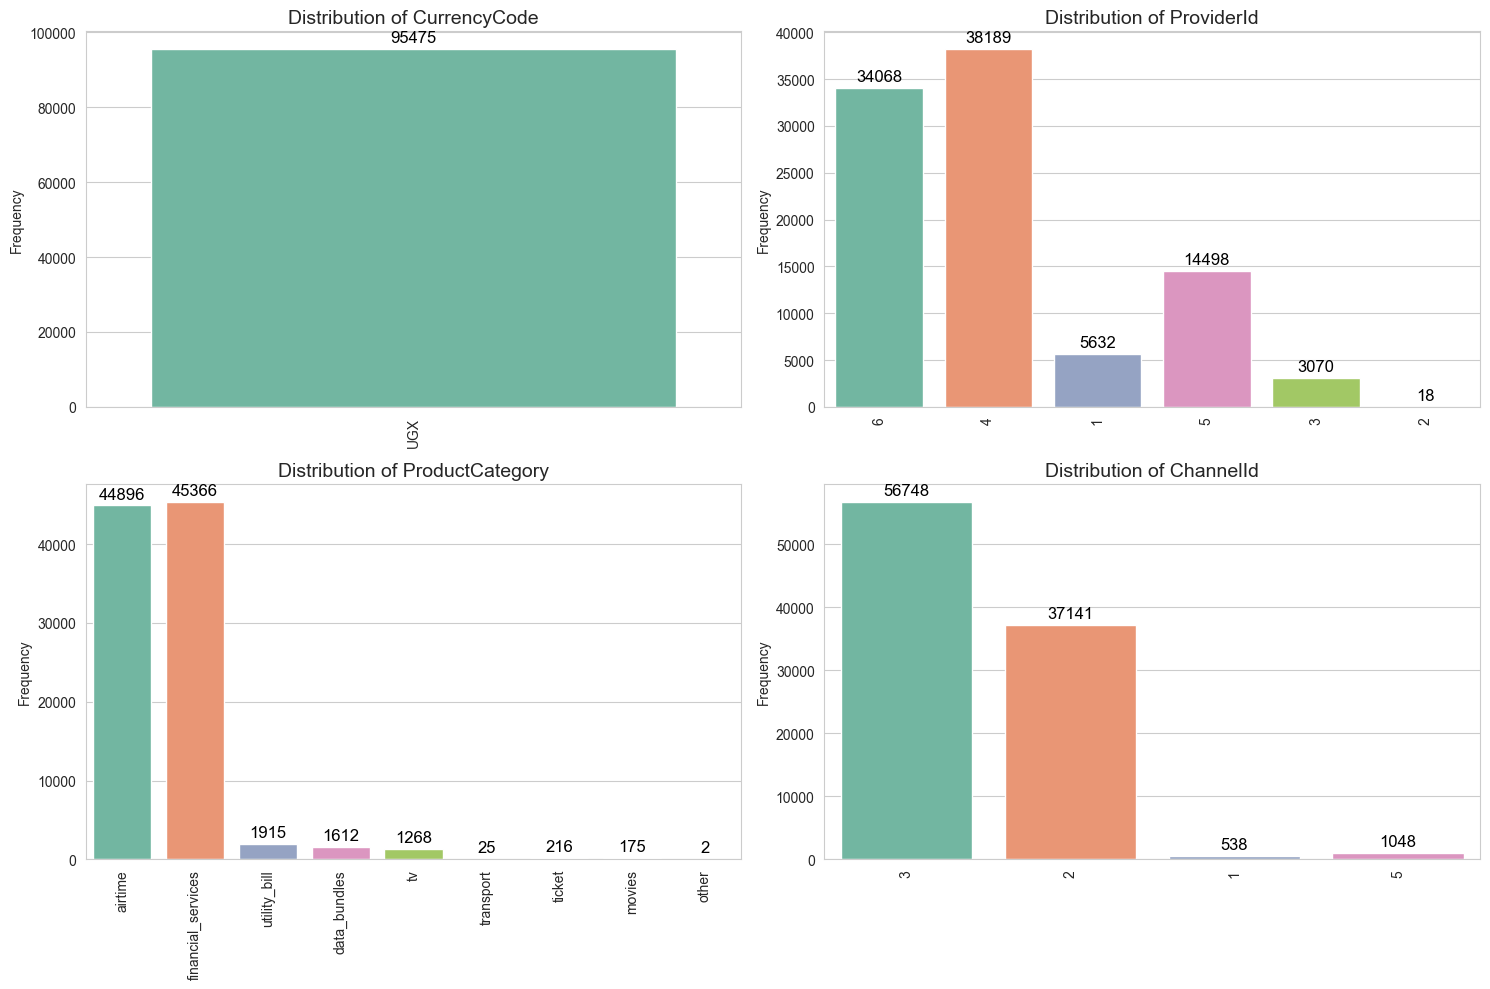

In [50]:
v.plot_categorical_distribution(df)

##### Visualizations Summary

**CurrencyCode:**

* The vast majority of transactions are in one specific currency code (probably the local currency).
* There are very few transactions in other currencies.

**ProviderID:**

* The distribution is skewed towards the top ProviderID.
* There are a few other ProviderIDs with a significant number of transactions.

**ProductCategory:**

* Airtime is the most common product category.
* Financial services and utility bills are also popular.
* The remaining categories have significantly fewer transactions.

**ChannelID:**

* Channel 3 is the most used channel.
* Channels 2 and 4 have a significant number of transactions.
* The remaining channels have very few transactions.

**Overall:**

* The dataset appears to be imbalanced, with most transactions concentrated in a few categories and channels.
* This imbalance might affect the analysis and modeling.

## Task 5: Correlation Analysis 

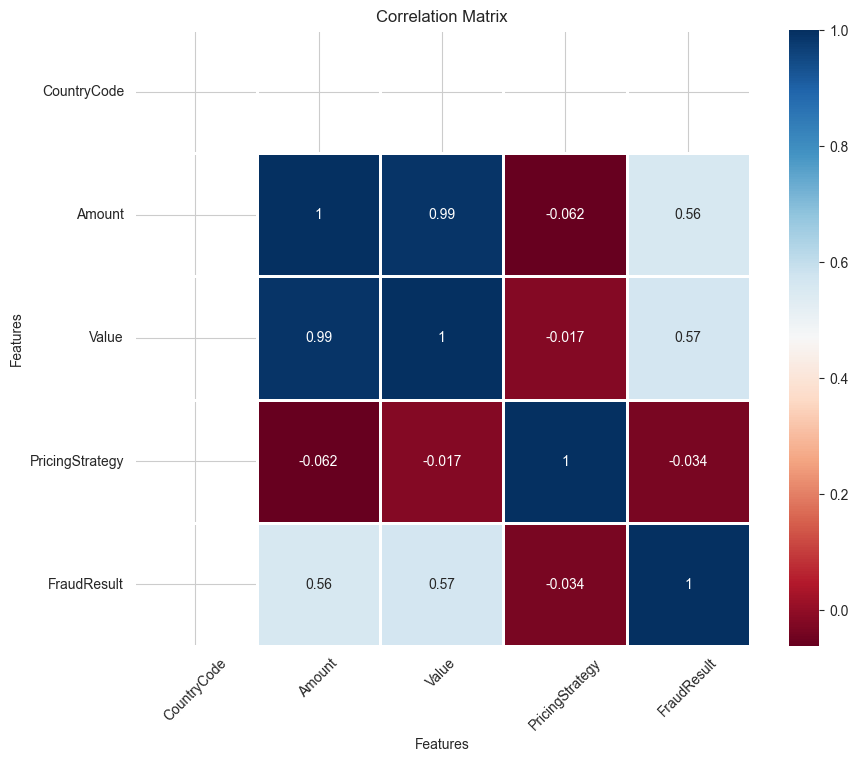

In [51]:
# Correlation analysis 
v.correlation_analysis(df, numerical_columns)

#### Correlation Matrix Insights:

**Positive Correlations:**

* **Amount and Value:** There is a very strong positive correlation between these two variables (0.99). This suggests that they are highly related and might be redundant in the analysis.
* **FraudResult and Amount:** There is a moderate positive correlation (0.56) between these two variables. This suggests that larger amounts are more likely to be fraudulent.
* **FraudResult and Value:** There is a moderate positive correlation (0.57) between these two variables. This suggests that larger values are more likely to be fraudulent.

**Negative Correlations:**

* **PricingStrategy and Amount:** There is a weak negative correlation (-0.062) between these two variables. This suggests that higher pricing strategies are associated with smaller amounts.
* **PricingStrategy and Value:** There is a weak negative correlation (-0.017) between these two variables. This suggests that higher pricing strategies are associated with smaller values.

**No Strong Correlation:**

* **CountryCode and other variables:** There is no strong correlation between CountryCode and any other variable.


## Task 6: Identifying Missing Values

In [52]:
cleaner.calculat_missing_percentage()

The dataset has 0.0% missing values.


In [53]:
cleaner.check_missing_values()

,Missing Values,% of Total Values,Data Types
TransactionId,0,0.0,object
BatchId,0,0.0,object
AccountId,0,0.0,object
SubscriptionId,0,0.0,object
CustomerId,0,0.0,object
CurrencyCode,0,0.0,object
CountryCode,0,0.0,int64
ProviderId,0,0.0,object
ProductId,0,0.0,object
ProductCategory,0,0.0,object


The data have no Missing values to clean so we put our all effort on feature enginerring.

## Task 7: Outlier Detection

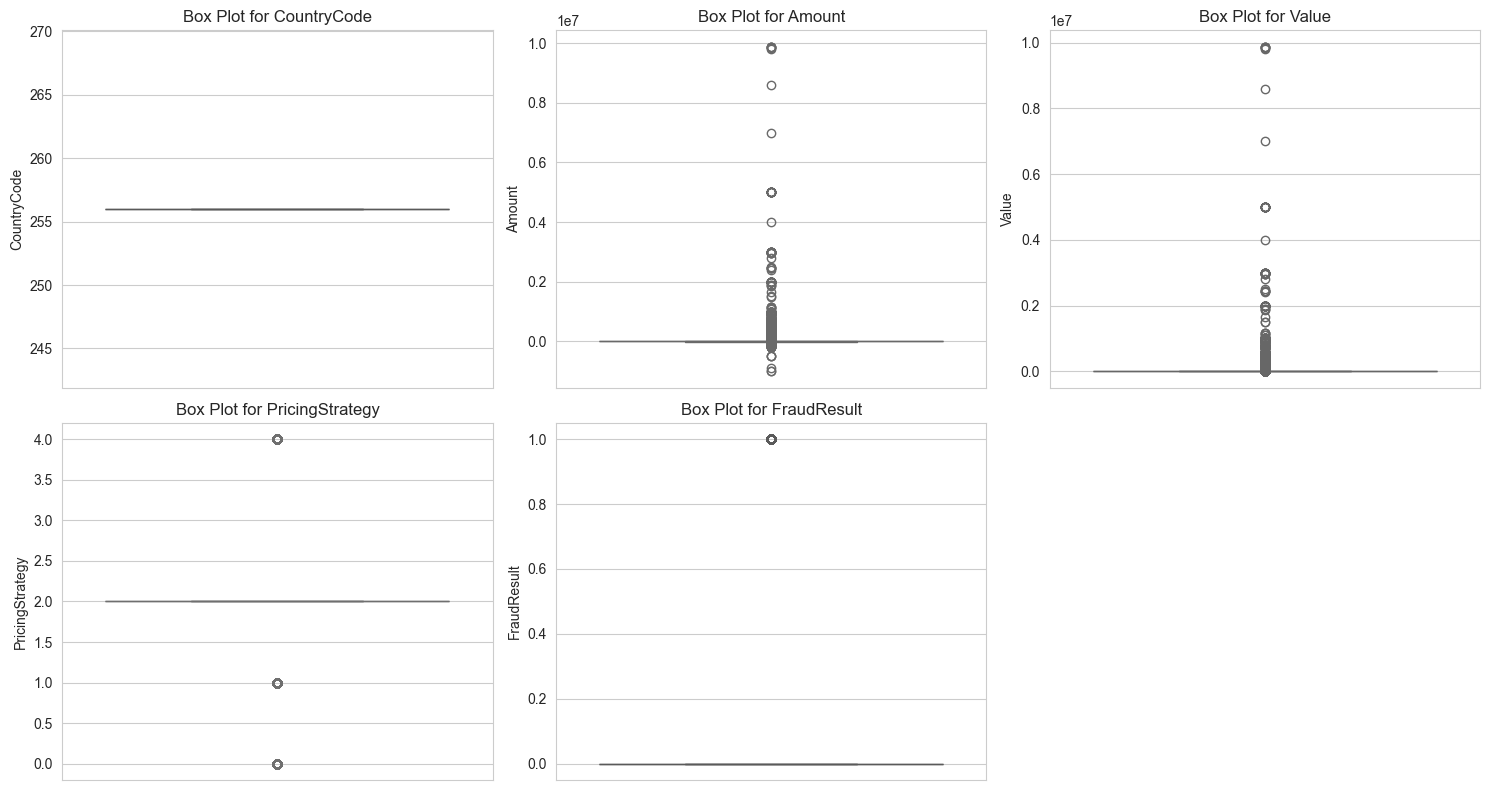

In [54]:
# Outlier Detection
v.outlier_detection(df, numerical_columns, style='whitegrid', nrows=2, ncols=3, figsize=(15,8), bins=30)

##### Insights from the box plots:

**CountryCode:**

* The distribution is highly skewed towards a single value (256).
* There are a few outliers at 265 and 270.

**Amount:**

* The distribution is right-skewed, with most transactions having smaller amounts.
* There are several outliers with very large amounts.

**Value:**

* The distribution is right-skewed, similar to the amount distribution.
* There are several outliers with very large values.

**PricingStrategy:**

* The distribution is highly skewed towards a single value (2).
* There are a few outliers at 0 and 4.

**FraudResult:**

* The distribution is highly skewed towards 0 (non-fraudulent).
* There are a few outliers at 1 (fraudulent).

**Overall:**

* The dataset appears to have some imbalances and outliers, which might impact the analysis and model building.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95475 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TransactionId         95475 non-null  object        
 1   BatchId               95475 non-null  object        
 2   AccountId             95475 non-null  object        
 3   SubscriptionId        95475 non-null  object        
 4   CustomerId            95475 non-null  object        
 5   CurrencyCode          95475 non-null  object        
 6   CountryCode           95475 non-null  int64         
 7   ProviderId            95475 non-null  object        
 8   ProductId             95475 non-null  object        
 9   ProductCategory       95475 non-null  object        
 10  ChannelId             95475 non-null  object        
 11  Amount                95475 non-null  float64       
 12  Value                 95475 non-null  int64         
 13  TransactionStartTime 

In [56]:
# Save data as a processed data for further analysis 
df = df.to_csv('../data/processed/processed_data.csv', index=False)